In [16]:
for p in ("Knet","JLD","JSON","Images","WordTokenizers")
    Pkg.installed(p) == nothing && Pkg.add(p)
end

In [17]:
using Images,JLD,Knet,WordTokenizers
global atype = gpu()<0 ? Array{Float32}:KnetArray{Float32}

Array{Float32,N} where N

In [21]:
include("demosetup.jl")
include("src/newmacnetwork.jl")

scalepixel (generic function with 1 method)

In [22]:
feats,qstsns,dics = loadDemoData("data/demo/");

INFO: Loading demo features ...
INFO: Loading demo questions ...
INFO: Loading dictionaries ...


In [23]:
w2i,a2i,i2w,i2a = dics;

In [24]:
_,wrun,r,_,p = loadmodel("models/macnet.jld";onlywrun=true);

In [25]:
if !(typeof(first(wrun)) <: atype)
    wrun = map(atype,wrun);
end;

In [26]:
rnd        = rand(1:length(qstsns))
inst       = qstsns[rnd]
feat       = feats[:,:,:,rnd:rnd]
question   = Array{Int}(inst[2])
answer     = inst[3];
family     = inst[4];
results,prediction = singlerun(wrun,r,feat,question;p=p);
answer==prediction

true

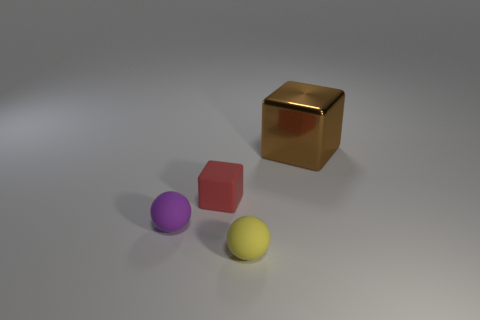

In [27]:
img = load("data/demo/CLEVR_v1.0/images/val/$(inst[1])")

In [28]:
textq  = i2w[question];
println("Question:\n",join(textq," "))
texta  = i2a[answer];
println("Answer: $(texta)\nPrediction: $(i2a[prediction]) ")

Question:
How many other things are made of the same material as the brown block ?
Answer: 0
Prediction: 0 


In [29]:
userinput = readline(STDIN)
words = tokenize(userinput)
question = [get!(w2i,wr,1) for wr in words]
results,prediction = singlerun(wrun,r,feat,question;p=p);
println("Question: $(join(i2w[question]," "))")
println("Prediction: $(i2a[prediction])")

stdin> how many object are there ?
Question: how many object are there ?
Prediction: 4


step_1 most attn. wrds: String["?", "there"]


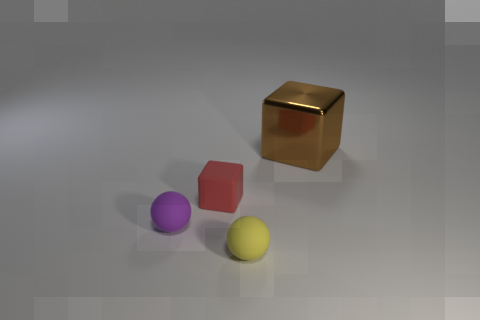

step_2 most attn. wrds: String["how", "?"]


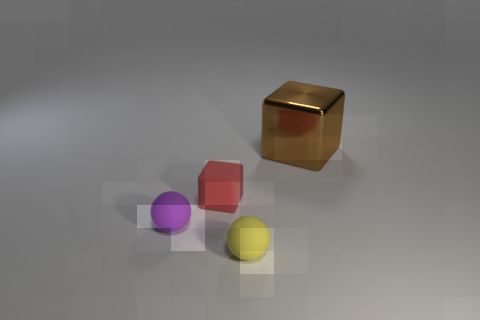

step_3 most attn. wrds: String["there", "are"]


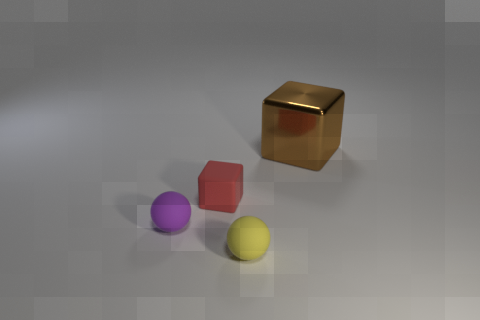

step_4 most attn. wrds: String["many", "object"]


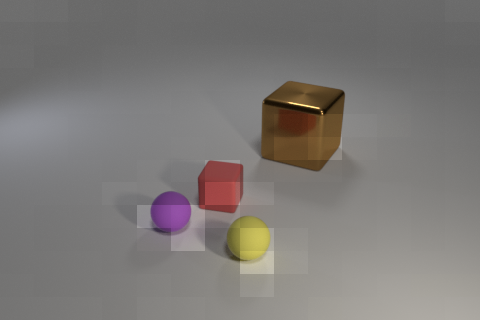

step_5 most attn. wrds: String["?", "many"]


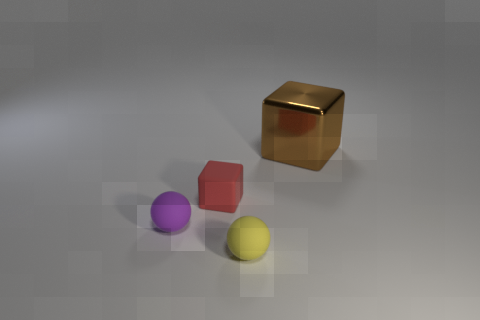

step_6 most attn. wrds: String["many", "how"]


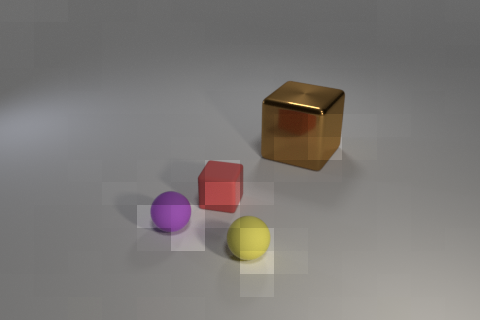

step_7 most attn. wrds: String["how", "many"]


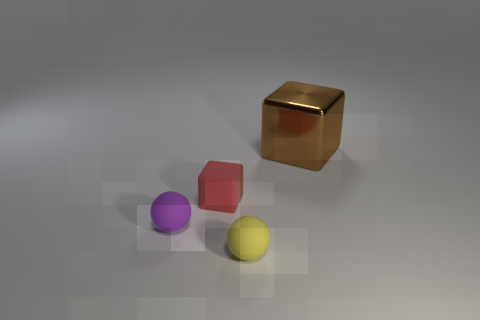

step_8 most attn. wrds: String["are", "object"]


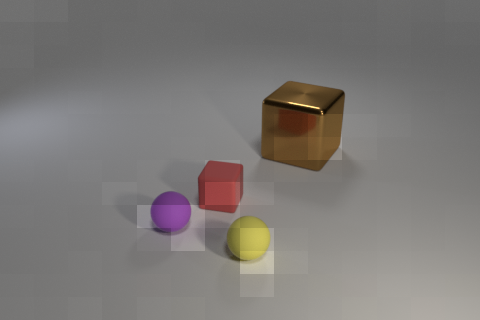

step_9 most attn. wrds: String["?", "there"]


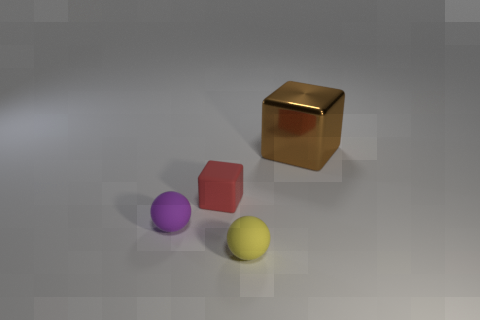

step_10 most attn. wrds: String["many", "how"]


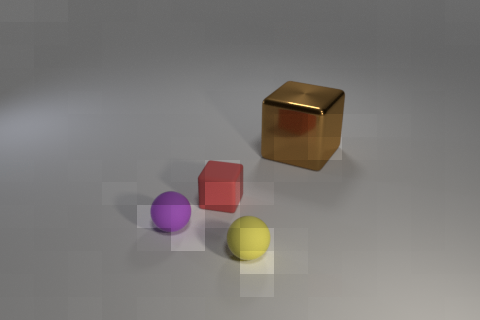

step_11 most attn. wrds: String["object", "how"]


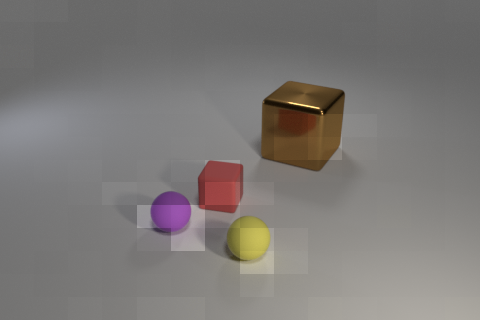

step_12 most attn. wrds: String["many", "how"]


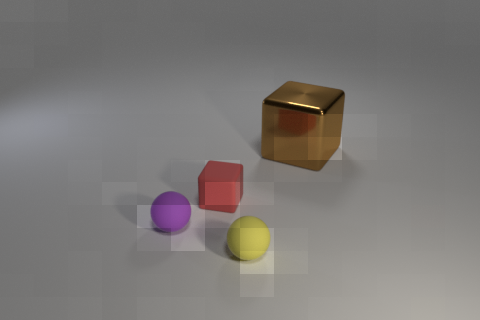

In [30]:
visualize(img,results;p=p)